# 2011 India Census

** INTRODUCTION **
- Census is nothing but a process of collecting, compiling, analyzing, evaluating, publishing and disseminating statistical data regarding the population. 
- It is a reflection of truth and facts as they exist in a country about its people, their diversity of habitation, religion, culture, language, education, health and socio-economic status. 
- The word ‘Census’ is derived from the Latin word ‘Censere’ meaning ‘to assess or to rate’.
- It covers demographic, social and economic data and are provided as of a particular date. Census is useful for formulation of development policies and plans and demarcating constituencies for elections. 
- The Census of India has been conducted 15 times, As of 2011. It has been conducted every 10 years, beginning in 1871.


** IMPORTING LIBRARIES **

First, let’s import all of the modules, functions and objects we are going to use

In [15]:
# Load libraries
import pandas as pd
from itertools import groupby
from __future__ import division
import operator
import matplotlib.pyplot as plt
import matplotlib.cm
% matplotlib inline
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import numpy as np
import seaborn as sns
import math

** LOADING THE DATA **

Let us analyze the dataset for 2011 India Census more getting deeper insights from it.


Firstly, we load the dataset in a pandas dataframe named 'data'.
Download and keep the file "india-districts-census-2011.csv" in the working directory.

In [2]:
# Load dataset
data = pd.read_csv("india-districts-census-2011.csv")

** SUMMARIZING THE DATASET **

**1. Dimensions of the dataset **

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [3]:
# shape
data.shape

(640, 118)

This dataset has information of 640 districts spread across various states in India, where each district has its own unique value for each of the 118 attributes. 


**2. Peek at the data **

Let's eyeball our data to get a clearer picture.

In [4]:
# head
data.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


**3. Statistical Summary**

Now we can take a look at a summary of each attribute.
This includes the count, mean, the min and max values as well as some percentiles.

In [5]:
# descriptions
data.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,320.500000,1891960.901563,973859.778125,918101.123437,1193185.643750,679318.159375,513867.484375,314653.706250,161773.928125,152879.778125,...,786.046875,1696.456250,294.000000,215.300000,509.300000,194.204688,261.245313,455.450000,279.631250,3315.412500
std,184.896367,1544380.287448,800778.523957,744986.392319,1068582.627696,592414.360959,480181.606352,312981.758539,161121.558555,152033.629623,...,1038.854733,1720.535151,638.345281,362.684243,968.538748,424.108001,587.279450,1007.364839,1050.934537,4638.568719
min,1.000000,8004.000000,4414.000000,3590.000000,4436.000000,2614.000000,1822.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,160.750000,817861.000000,417168.250000,401745.750000,482598.250000,276436.500000,200892.000000,83208.500000,42307.000000,42671.750000,...,236.750000,589.000000,59.000000,24.750000,95.000000,19.000000,21.000000,44.000000,18.000000,1024.250000
50%,320.500000,1557367.000000,798681.500000,758920.000000,957346.500000,548352.500000,403859.000000,246016.000000,125548.500000,117855.000000,...,518.000000,1220.500000,149.000000,118.500000,278.000000,84.000000,85.500000,186.500000,60.500000,2238.500000
75%,480.250000,2583551.250000,1338604.500000,1264276.750000,1602260.250000,918858.250000,664155.000000,447707.750000,228460.250000,214050.250000,...,941.250000,2233.250000,296.500000,262.000000,564.500000,213.250000,293.000000,497.000000,215.500000,3959.000000
max,640.000000,11060148.000000,5865078.000000,5195070.000000,8227161.000000,4591396.000000,3635765.000000,2464032.000000,1266504.000000,1197528.000000,...,10334.000000,13819.000000,10835.000000,3595.000000,14430.000000,5027.000000,7597.000000,12624.000000,18289.000000,60163.000000


**4. Class Distribution**

Let’s now take a look at the number of instances districts that belong to each state. We can view this as an absolute count.

In [6]:
# class distribution
print(data.groupby('State name').size())

State name
ANDAMAN AND NICOBAR ISLANDS     3
ANDHRA PRADESH                 23
ARUNACHAL PRADESH              16
ASSAM                          27
BIHAR                          38
CHANDIGARH                      1
CHHATTISGARH                   18
DADRA AND NAGAR HAVELI          1
DAMAN AND DIU                   2
GOA                             2
GUJARAT                        26
HARYANA                        21
HIMACHAL PRADESH               12
JAMMU AND KASHMIR              22
JHARKHAND                      24
KARNATAKA                      30
KERALA                         14
LAKSHADWEEP                     1
MADHYA PRADESH                 50
MAHARASHTRA                    35
MANIPUR                         9
MEGHALAYA                       7
MIZORAM                         8
NAGALAND                       11
NCT OF DELHI                    9
ORISSA                         30
PONDICHERRY                     4
PUNJAB                         20
RAJASTHAN                      33
SIK


The tasks of loading and summarizing the dataset are thus complete. Lets dive into answering the following questions :
    
## 1. Create a geographic map of states with low literacy rates.

Step 1. Group all the rows of the same state together

Step 2. Iterate through each group and calculate the total population and total literate population for that particular state.

Step 3. Literacy rate = (total literate population / total population) * 100

Step 4. Store the results for each state

Step 5. Plot the results in a geographic map of India

In [7]:
'''
Calculating state wise literacy rates
'''

# Group the data state-wise
states_group = data.groupby(by = "State name")

# List for storing tuples which contain state-name and its corresponding literacy rate
literacy_rate = []

# Iterate through each group (a group has rows with the same state-name throughout the group)
# Here, key contains 'State name' and group contains all the corresponding rows
for key , group in states_group:
    # Total population and total literate population across the state
    total_state_pop = 0
    total_literate_pop = 0
    # Iterate through all the rows of the group to get total state population and total literate state population
    for row in group.iterrows():
        total_state_pop += row[1][3] # 3 is the index of column 'Population'
        total_literate_pop += row[1][6] # 6 is the index of column 'Literate'
    
    # Calculate literacy rate for the state
    rate = (total_literate_pop/total_state_pop)*100
    # Store the result as a tuple in the list literacy_rate, contaning pairs of state names and literacy rates
    literacy_rate.append((key,rate))
    
print ("Statewise literacy rates : \n")
print (literacy_rate)

Statewise literacy rates : 

[('ANDAMAN AND NICOBAR ISLANDS', 77.32414387475991), ('ANDHRA PRADESH', 59.77334542575791), ('ARUNACHAL PRADESH', 55.35810170647822), ('ASSAM', 61.45689155040753), ('BIHAR', 50.43691584466746), ('CHANDIGARH', 76.31228385996495), ('CHHATTISGARH', 60.20670499402666), ('DADRA AND NAGAR HAVELI', 64.94738281511395), ('DAMAN AND DIU', 77.45460375667531), ('GOA', 79.9075105670377), ('GUJARAT', 67.99068069374013), ('HARYANA', 65.47546646422207), ('HIMACHAL PRADESH', 73.41628837330991), ('JAMMU AND KASHMIR', 56.351669069128555), ('JHARKHAND', 55.55958090869887), ('KARNATAKA', 66.5310162908284), ('KERALA', 84.2237101824127), ('LAKSHADWEEP', 81.51164053169543), ('MADHYA PRADESH', 59.00186114469107), ('MAHARASHTRA', 72.5737700262924), ('MANIPUR', 66.8282095977511), ('MEGHALAYA', 60.16419893025995), ('MIZORAM', 77.30316822912015), ('NAGALAND', 67.85103072930934), ('NCT OF DELHI', 75.87450420513153), ('ORISSA', 63.71195527692738), ('PONDICHERRY', 76.71034085418282), ('PU

**PLOTTING A GEOGRAPHIC MAP FOR STATEWISE LITERACY RATES**

**1. Getting coordinates**

We take help of this awesome tool called [Bounding box tool](http://boundingbox.klokantech.com/) for getting coordinates of India so that we can draw the same as a matplotlib plot. Search for 'India' in the search area provided.
At the bottom there is a box with some longitude and latitudes in. 

To the left of that there is a drop down menu, click that and select DublinCore; this is the easiest format to understand in my opinion and it’s in a form that can be directly used in Basemap. The first two numbers labeled ‘westlimit’ and ‘southlimit’ are the latitude and longitude of your lower left corner. The other two, labelled ‘eastlimit’ and ‘northlimit’ are the latitude and longitude of your upper right corner.

**2. Creating a map**

We will create a figure to draw our map on and then create our map.
With the *drawmapboundary()* function we can set the colour of the seas and oceans on our map. Here I have set it to a light blue colour. The *fillcontinents()* function does just as it suggests, this is the colour of land masses. I have set them to a light-grey colour and have set lakes to the same colour as I set the sea. Finally the *drawcoastlines()* function draws lines around the land masses.

**3. Using Shapefiles for drawing states**

Download shape file of India from [here](https://www.arcgis.com/home/item.html?id=cf9b387de48248a687aafdd4cdff1127) .Using *readshapefile()* the shape file is loaded.
The first argument is the path to the shapefile. The second is the name that will be used to access the shapefile.

**4. Creating a dataframe mapping shapes to literacy rates and state names**

Our shapefile contains multiple shapes for each state, so we need to map each state's literacy rate and state name correctly. We then create a dataframe combining all the three.

**5. Using data to color areas**

Finally, we color all the states according to their literacy rates. Darker shade represents higher literacy rates while a lighter shade represents a lower literacy rates.



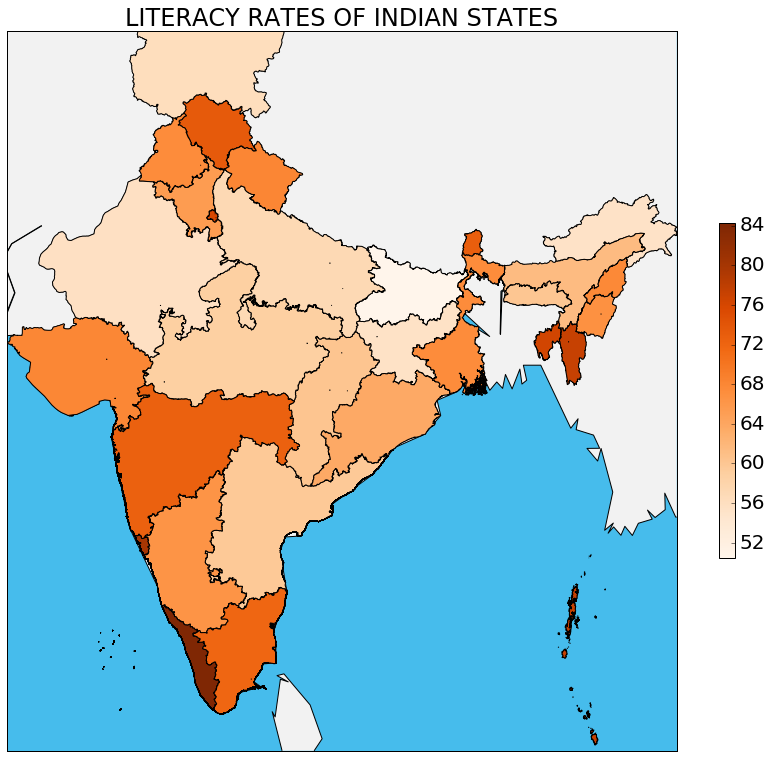

In [9]:
'''
STEP 2 : CREATING A MAP
'''
# Create figure 
fig, ax = plt.subplots()
# Create a map with the coordinates determined by the Bounding Box tool
m = Basemap(projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=68.1, llcrnrlat= 6.5, urcrnrlon=97.4, urcrnrlat=35.5)
# Draw map boundary and set the color
m.drawmapboundary(fill_color='#46bcec')
# Fill continents and lakes
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
# Draw coast lines
m.drawcoastlines()

'''
STEP 3 : USING SHAPEFILES FOR DRAWING STATES 
'''
# Load the shape file of India
m.readshapefile("D:\MSIT\gramener\INDIA","INDIA")


'''
STEP 4 : CREATING A DATAFRAME MAPPING SHAPES TO STATE NAME AND LITERACY RATES
'''
# Create an empty list to hold literacy rates
lit_rate = []
# Iterate through all rows of INDIA_info file
# Each row is a dictionary. Here, we try to map state name with literacy rate
for state_info in m.INDIA_info:
    # Get the state in uppercase, as our csv file has state names in upper case
    state = state_info['ST_NAME'].upper()
    # initialize rate = 0
    rate = 0
    
    # In literacy_rate (containing tuples of state name and literacy rates), search for state 'state'
    # Append its corresponding literacy rate to lit_rate
    for x in literacy_rate:
        if x[0] == state:
            rate = x[1]
            break
    lit_rate.append(rate)            
    
# Create a dataframe containing shapes, state names and literacy rates    
df_poly = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.INDIA],
        'area': [area['ST_NAME'] for area in m.INDIA_info],
        'lit_rate' : lit_rate
    })

'''
STEP 5 : USING DATA TO COLOR AREAS
'''
# Get all the shapes
shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
# Create a colormap
cmap = plt.get_cmap('Oranges')   
# Create a patch collection. Create patches on the top of the map, not beneath it (zorder=2)
pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
# Set color according to the literacy rate of the state
pc.set_facecolor(cmap(norm(df_poly['lit_rate'].fillna(0).values)))
ax.add_collection(pc)

# Create a mapper to map color intensities to values
mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(lit_rate)
plt.colorbar(mapper, shrink=0.4)
# Set title for the plot
ax.set_title("LITERACY RATES OF INDIAN STATES")
# Change plot size and font size
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams.update({'font.size': 20})
plt.show()

Lets inquire about the bottom 5 states with respect to literacy rates 

In [10]:
literacy_rate.sort(key = operator.itemgetter(1))
print literacy_rate[:5]

[('BIHAR', 50.43691584466746), ('ARUNACHAL PRADESH', 55.35810170647822), ('JHARKHAND', 55.55958090869887), ('RAJASTHAN', 55.8368413272501), ('JAMMU AND KASHMIR', 56.351669069128555)]


#### States like Bihar, Arunachal Pradesh, Jharkhand, Rajasthan and Jammu Kashmir have low literacy rates. This can be also verified by the map of India visualized for literacy rates above as well.



One important thing to note here is this: 

Literacy is defined as the ability to read, write and use arithmetic, for people having **age more than 7 years**.
 
In our calculations, we have also counted children aged from 0-6 years in total population. The correct way to calculate it would be to subtract child population from total population and then compute the percentage.

Because there is no related column in our data which states no. of children(age 0-6), are results are slightly lesser than the actual literacy rates, but the overall visualization for the above heatmap seems reasonable and is relatable with the actual data.

## 2. Find out most similar districts in Bihar and Tamil Nadu. Similarity can be based on any of the columns from the data.

First, lets subset our data by creating two different data frames for Bihar and Tamil Nadu

In [11]:
df_Bihar = data.loc[data['State name'] == 'BIHAR']
df_Tamil_Nadu = data.loc[data['State name'] == 'TAMIL NADU']


The Bihar dataframe :

In [12]:
df_Bihar.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
202,203,BIHAR,Pashchim Champaran,3935042,2061110,1873932,1759481,1091226,668255,553944,...,621,1968,138,21,159,30,49,79,40,3181
203,204,BIHAR,Purba Champaran,5099371,2681209,2418162,2276957,1407603,869354,649726,...,797,2551,223,18,241,25,40,65,47,4098
204,205,BIHAR,Sheohar,656246,346673,309573,283698,171645,112053,96655,...,90,301,4,1,5,2,3,5,4,489
205,206,BIHAR,Sitamarhi,3423574,1803252,1620322,1436794,885188,551606,405714,...,520,1670,69,10,79,14,22,36,29,2679
206,207,BIHAR,Madhubani,4487379,2329313,2158066,2155338,1340085,815253,587158,...,668,2203,165,7,172,10,17,27,26,3520





And, for Tamil Nadu :

In [13]:
print "rows = %s"%(str(len(df_Tamil_Nadu)))
df_Tamil_Nadu.head()

rows = 32


,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
601,602,TAMIL NADU,Thiruvallur,3728104,1876062,1852042,2791721,1495711,1296010,821646,...,1732,3672,1137,455,1592,472,876,1348,580,7731
602,603,TAMIL NADU,Chennai,4646732,2335844,2310888,3776276,1968079,1808197,779667,...,3685,5802,1954,1866,3820,748,1214,1962,3686,15742
603,604,TAMIL NADU,Kancheepuram,3998252,2012958,1985294,3013382,1611461,1401921,948081,...,1965,3958,1138,560,1698,522,832,1354,797,8349
604,605,TAMIL NADU,Vellore,3936331,1961688,1974643,2773928,1504355,1269573,860212,...,1670,4125,1082,579,1661,340,777,1117,402,8092
605,606,TAMIL NADU,Tiruvannamalai,2464875,1235889,1228986,1626813,909803,717010,565329,...,798,2317,483,324,807,118,271,389,131,4189


** SIMILARITY **

To measure the similarity between two instances we can use the Euclidean distance measure. Similarity score is the inverse of Euclidean distance. Larger Euclidean distance corresponds to smaller similarity score and vice-versa.

However on observing the data we notice that the first three features are not numbers and also that the remaining features vary over a large range. In order to account for these we do the following:

- To find the euclidean distance we compute sum of squared differences of the attribute values for each column (between each row of Bihar districts and Tamil Nadu districts). 

- Then, we compute the square root of the total sum computed above and inverse it. Resultant obtained is the similarity score.

- If features vary over a large range then the largest component will dominate the calculation of the similarity score. In order to avoid this we normalize the numerical attributes so that they fall between 0 and 1.


** CALCULATING SIMILAR DISTRICTS **

Putting all of this together we can define the *similar_districts()* function as follows:

In [31]:
def similar_districts(df1, df2):
    # Set indices for both the data frames
    df1.set_index('District code')
    df2.set_index('District code')
    
    # The similarity matrix of size len(df1) X len(df2)
    main_diff = []
    
    # Iterate through rows of df1
    for row1 in df1.iterrows(): 
        # Create list to hold similarity score of row1 with other rows of df2
        diff=[]
        # Iterate through rows of df2
        for row2 in df2.iterrows():
            # Calculate sum of squared differences
            dist = 0
            for column in list(data)[3:]:
                max_col = max(data[column])
                min_col = min(data[column]) 
    
                dist += pow((row1[1][column] - row2[1][column])/(max_col - min_col),2)
            # Take sqrt and inverse the result
            diff.append(1/math.sqrt(dist))
        # Append similarity scores
        main_diff.append(diff)

    # Find the max value of similarity score from lists of lists
    max_val = 0
    max_index1 = 0
    max_index2 = 0
    for i in range(len(main_diff)):

        for j in range(len(main_diff[i])):
            if(main_diff[i][j] > max_val):
                max_val = main_diff[i][j]
                max_index1 = i
                max_index2 = j

    print "%s from Bihar and %s from Tamil Nadu are most similar" %(df1['District name'].iloc[max_index1],
                                                                    df2['District name'].iloc[max_index2])
    return main_diff
    
sim_matrix = similar_districts(df_Bihar, df_Tamil_Nadu)


Sheohar from Bihar and Perambalur from Tamil Nadu are most similar


** PLOTTING THE SIMILARITY MATRIX **

We plot the similarity matrix using seaborn after normalizing it so that the values range between 0 and 1. Cell with the darkest shade represents the highest similarity score. Similarity score for the cell corresponding to **Sheohar**(Bihar) and **Perambur**(Tamil Nadu) is the highest. Hence, these two districts are most similar. 

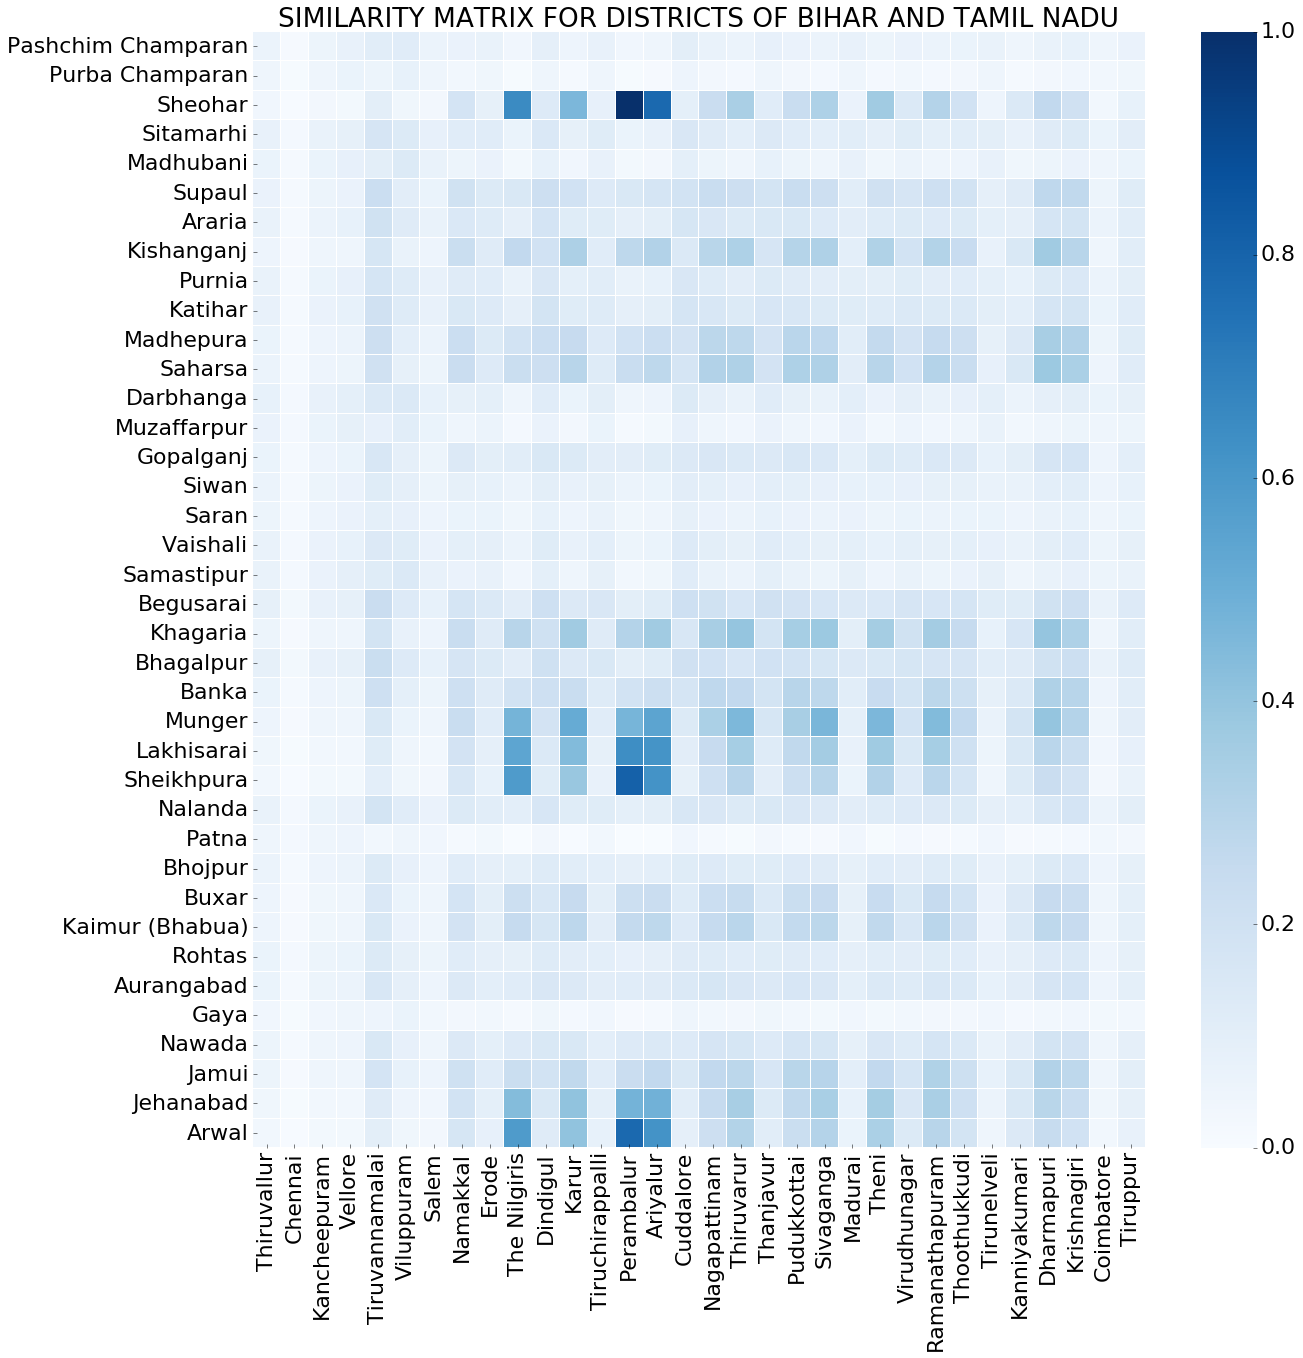

In [37]:
norm=Normalize()
ax = plt.axes()
# Plot the matrix using a heatmap from seaborn
# Values of the matrix are normalized so as to fall between 0 and 1
sns.heatmap(norm(sim_matrix), xticklabels=df_Tamil_Nadu['District name'],yticklabels=df_Bihar['District name'],
            linewidths=0.05,cmap='Blues').set_title("SIMILARITY MATRIX FOR DISTRICTS OF BIHAR AND TAMIL NADU")
plt.rcParams['figure.figsize'] = (15,15)

## 3. How does the mobile penetration vary in regions (districts or states) with high or low agricultural workers?

In order to visualize mobile penetration  and agricultural workers' districution per state, we need to group all the rows of same state and find total agricultural workers and total households with mobile for each state. 


In [47]:
# Create a group w.r.t. State name
states_group = data.groupby(by = "State name")

# Lists for storing mobile penetration and agri workers' values for each state
households_with_mobile = []
agri_workers = []

# Iterate through the groups
for key , group in states_group:
    total_mobi_pop = 0
    total_agri_workers = 0
    
    # Iterate through each group and calculate total agri workers and total households with mobiles
    for row in group.iterrows():
    
        #total_mobi_pop += row[1][58] # 58 = Index of column 'Households_with_Telephone_Mobile_Phone_Landline_only'
        total_mobi_pop += row[1][59] # 59 = Index of column 'Households_with_Telephone_Mobile_Phone_Mobile_only'
        total_agri_workers += row[1][22] # 22 = Index of 'Agricultural Workers'
    
    # Append both values to respective lists
    households_with_mobile.append((key,total_mobi_pop))
    agri_workers.append((key,total_agri_workers))
    
# Create a dataframe holding state name, households_with_mobile and agri_workers 
df_mobile_penetration =  pd.DataFrame({
        'state' : [x[0] for x in households_with_mobile] ,
        'Households_with_mobile': [x[1] for x in households_with_mobile],
        'agri_workers' : [x[1] for x in agri_workers]
        
    })

# View the dataframe
df_mobile_penetration

,Households_with_mobile,agri_workers,state
0,67286,4781,ANDAMAN AND NICOBAR ISLANDS
1,11549740,16967754,ANDHRA PRADESH
2,104094,36171,ARUNACHAL PRADESH
3,2766506,1845346,ASSAM
4,9773448,18345649,BIHAR
5,148411,1687,CHANDIGARH
6,1528665,5091882,CHHATTISGARH
7,41837,17799,DADRA AND NAGAR HAVELI
8,45871,772,DAMAN AND DIU
9,173533,26760,GOA


** PLOTTING STATEWISE DISTRIBUTION OF HOUSEHOLDS USING MOBILES AND AGRICULTURAL WORKERS **

We visualize the above data using bar graphs of HOUSEHOLDS USING MOBILES AND AGRICULTURAL WORKERS for each state.

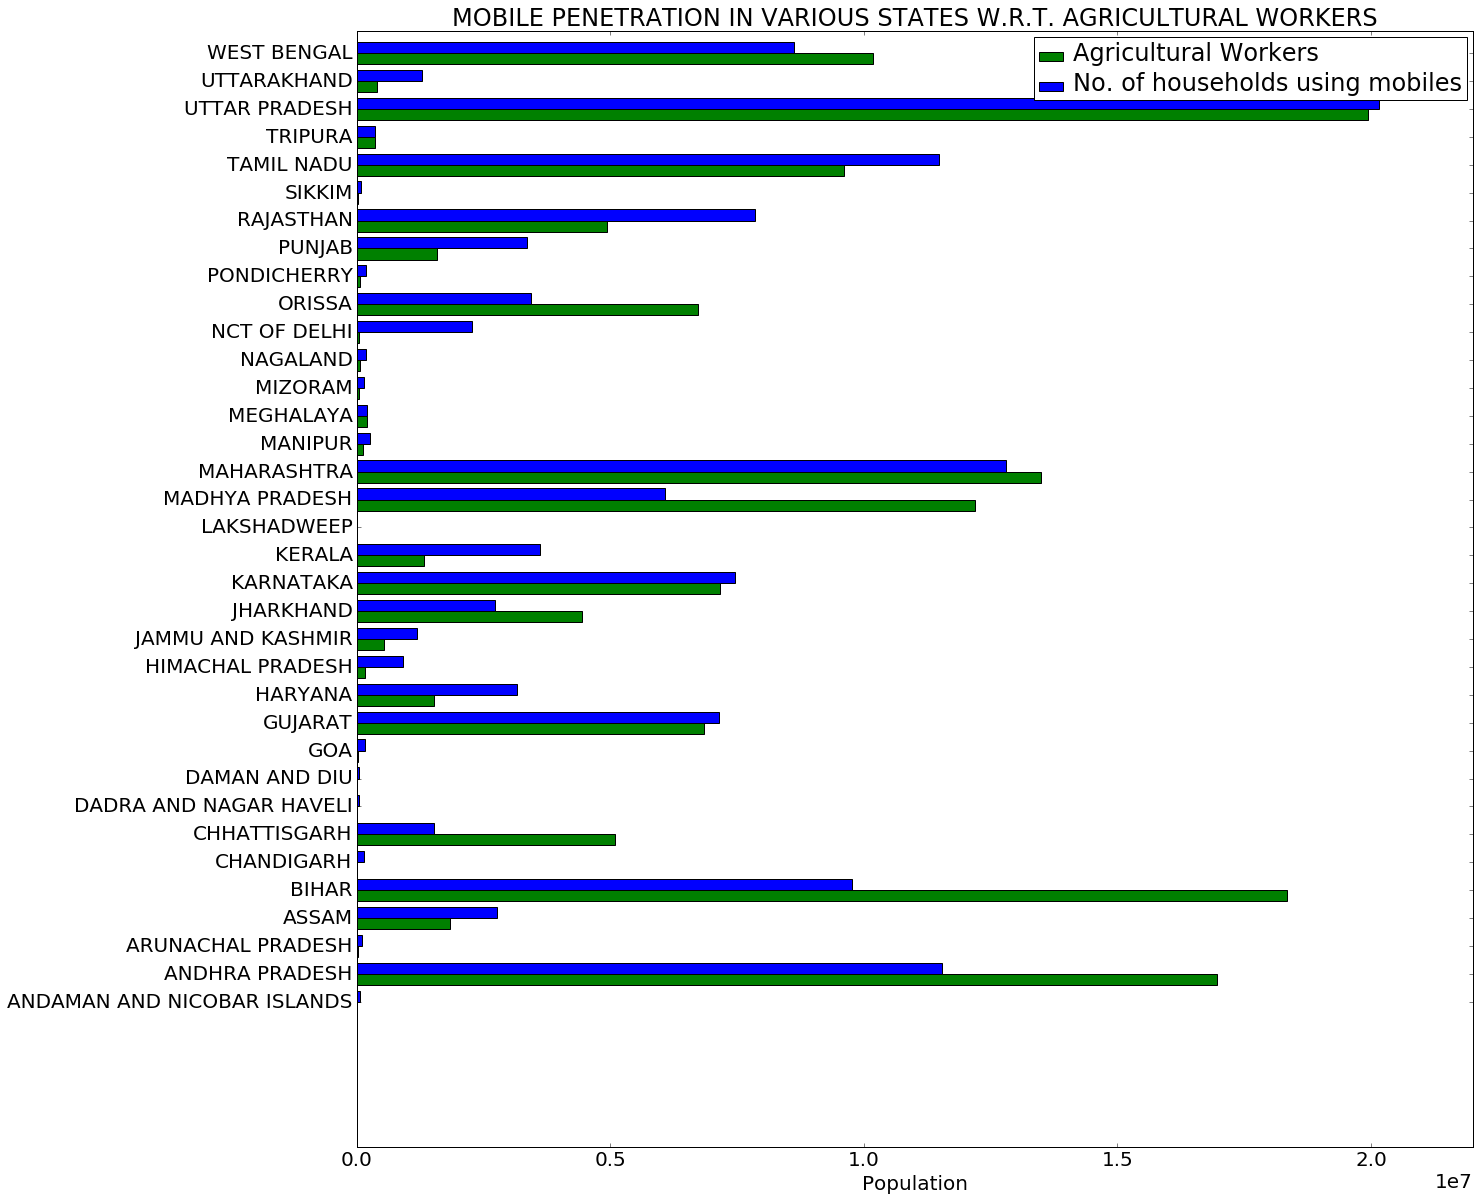

In [46]:
from numpy import *
ind = arange(35)
width = 0.4

fig, ax = plt.subplots()
plt.xlim(0,22000000)
rects1 = ax.barh(ind, df_mobile_penetration['agri_workers'],width,color='g',align='center')
rects2 = ax.barh(ind+width, df_mobile_penetration['Households_with_mobile'],width,color='b',align='center')
ax.set_xlabel('Population')
ax.set_title('MOBILE PENETRATION IN VARIOUS STATES W.R.T. AGRICULTURAL WORKERS')
ax.set_yticks(ind + width / 2)
ax.set_yticklabels((x for x in df_mobile_penetration['state']))
ax.legend((rects1[0], rects2[0]), ('Agricultural Workers', 'No. of households using mobiles'))
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (20,20)
plt.show()

States like **Maharashtra** and **UP** have very less difference in number of agriclutural workers and number of households using mobiles.

States like **Bihar, AP and MP** have a significant amount of difference in number of agriclutural workers and number of households using mobiles.